In [9]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [10]:
def compute_mse(y, tx, w):
    e = y - tx.dot(w)
    sum2 = e.T.dot(e)
    return sum2 / len(y)

def least_squares(y, tx):
    """calculate the least squares solution."""
    lstsq = np.linalg.lstsq(tx, y)[0]
    return compute_mse(y, tx, lstsq), lstsq

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [11]:
from helpers import *

def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    print(least_squares(y, tx))

Test it here

In [12]:
test_your_least_squares()

(30.771775737658817, array([ 73.293922  ,  13.47971243]))


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [13]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [50]:
# in build_poly.py
print(build_poly(x, 12))

[[  1.00000000e+00   3.52374910e-01   1.24168077e-01   4.37537150e-02
    1.54177114e-02   5.43281467e-03   1.91438758e-03   6.74582151e-04
    2.37705825e-04   8.37615686e-05   2.95154752e-05   1.04005129e-05
    3.66487980e-06]
 [  1.00000000e+00   4.89512330e+00   2.39622321e+01   1.17298081e+02
    5.74188568e+02   2.81072384e+03   1.37588397e+04   6.73512170e+04
    3.29692511e+05   1.61388549e+06   7.90016848e+06   3.86722988e+07
    1.89305671e+08]
 [  1.00000000e+00   1.86662437e+00   3.48428655e+00   6.50385420e+00
    1.21402528e+01   2.26612917e+01   4.23001194e+01   7.89584339e+01
    1.47385737e+02   2.75113809e+02   5.13534141e+02   9.58575345e+02
    1.78930010e+03]
 [  1.00000000e+00   3.50706129e+00   1.22994789e+01   4.31350264e+01
    1.51277181e+02   5.30538347e+02   1.86063050e+03   6.52534521e+03
    2.28847856e+04   8.02583457e+04   2.81470938e+05   9.87135831e+05
    3.46194586e+06]
 [  1.00000000e+00   3.38087384e+00   1.14303079e+01   3.86444289e+01
    1.3065

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [28]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 10, 12, 15]
    
    # define the structure of the figure
    num_row = 2
    num_col = 3
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        poly = build_poly(x, degree)
        mse, weights = least_squares(y, poly)
        rmse = np.sqrt(mse)
        

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421885
Processing 2th experiment, degree=3, rmse=0.25858277667737495
Processing 3th experiment, degree=7, rmse=0.24965870360907777
Processing 4th experiment, degree=10, rmse=0.2482157893656872
Processing 5th experiment, degree=12, rmse=0.24032507464434785
Processing 6th experiment, degree=15, rmse=0.2330486119487621


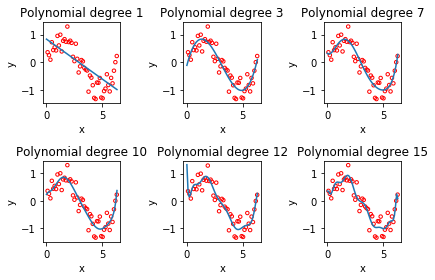

In [29]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [49]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    zipped = np.dstack((x, y))[0]
    np.random.shuffle(zipped)
    
    pivot = int(np.round(len(zipped) * ratio))
    return zipped[:pivot].T, zipped[pivot:].T


(40,)


Then, test your `split_data` function below.

In [70]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    
    (train_x, train_y), (test_x, test_y) = split_data(x, y, ratio, seed)
    
    train_poly = build_poly(train_x, degree)
    test_poly  = build_poly(test_x, degree)
   
    
    train_mse, train_lstsq = least_squares(train_y, train_poly)
    test_mse = compute_mse(test_y, test_poly, train_lstsq)
    
    rmse_tr = np.sqrt(train_mse)
    rmse_te = np.sqrt(test_mse)
    
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [71]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.065
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.202
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=10.218


# 3 Ridge Regression
Please fill in the function below.

In [136]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    l = lambda_ * 2 * len(y)
    xtx = tx.T.dot(tx) # 8x8
    ident = np.identity(len(xtx)) * l # 8x8
    i = xtx + ident # 8x8
    inv = np.linalg.inv(i) # 8x8
    a = inv.dot(tx.T)
    return a.dot(y)


In [145]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    (train_x, train_y), (test_x, test_y) = split_data(x, y, ratio, seed)
    
    train_poly = build_poly(train_x, degree)
    test_poly  = build_poly(test_x, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # ridge regression with a given lambda
        # ***************************************************
        ridge = ridge_regression(train_y, train_poly, lambda_)
        rmse_tr.append(np.sqrt(compute_mse(train_y, train_poly, ridge)))
        rmse_te.append(np.sqrt(compute_mse(test_y, test_poly, ridge)))
        print(len(rmse_te))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)



1
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
2
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
3
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
4
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
5
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
6
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
7
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
8
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
9
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
10
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
11
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
12
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
13
proportion

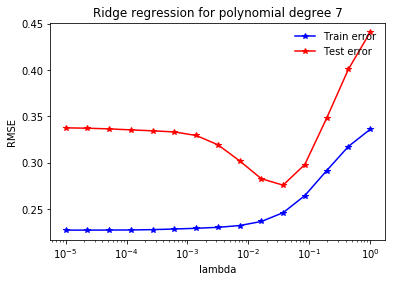

In [146]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)